In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
# Import the necessaries libraries
import plotly.offline as pyo
import plotly.graph_objs as go
# Set notebook mode to work in offline
# pyo.init_notebook_mode()

# NLP Libraries
from textblob import TextBlob
import spacy

# %matplotlib inline

In [2]:
# Testing Spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp('This is a sentence.')
for t in doc:
    print(t)

This
is
a
sentence
.


## Sentiment of Speech

In [3]:
# Loading corpus
corpus = pd.read_pickle('./pickled_files/clean_sotu_speeches_corpus.pkl')
corpus.head()

,sotu_date,president_name,clean_text,president_party,year
0,1793-12-03,George Washington,fellow citizens of the senate and house of rep...,federalist,1793
1,1794-11-19,George Washington,fellow citizens of the senate and house of rep...,federalist,1794
2,1795-12-08,George Washington,fellow citizens of the senate and house of rep...,federalist,1795
3,1796-12-07,George Washington,fellow citizens of the senate and house of rep...,federalist,1796
4,1797-11-22,John Adams,gentlemen of the senate and gentlemen of the h...,federalist,1797


### 1 | TextBlob

In [4]:
# Functions for polarity and subjectivity of each speech
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

corpus['polarity'] = corpus.clean_text.apply(pol)
corpus['subjectivity'] = corpus.clean_text.apply(sub)

In [5]:
positive_speech_example = "I recently watched the movie 'Soul' and was thoroughly impressed by its stunning animation, compelling storyline, and powerful messages about the meaning of life and pursuing one's passions. The film's creative approach to exploring complex concepts made for an entertaining and uplifting viewing experience."
# negative_speech_example = "I was disappointed by the restaurant I visited last night, as the food was overpriced and lacked flavor, and the service was slow and inattentive. The overall experience was unsatisfactory and did not live up to my expectations."
negative_speech_example = "I was disappointed by the new software update, as it caused my computer to slow down and experience frequent crashes, making it difficult to complete my work efficiently. The technical issues and inconvenience it caused made it a frustrating and regrettable experience."

facts_speech_example = "The Great Barrier Reef, located off the coast of Australia, is the world's largest coral reef system and is home to an abundance of marine life. It spans over 2,300 kilometers and is a major tourist attraction, generating billions of dollars for the Australian economy."
opinion_speech_example = 'I believe that access to quality education is a fundamental right for all individuals and should be prioritized by governments worldwide, as it is the key to unlocking personal and societal progress. It is crucial that we work towards creating equitable educational opportunities that empower people to reach their full potential and contribute to a brighter future.'


neg_score = TextBlob(negative_speech_example).sentiment.polarity
pos_score = TextBlob(positive_speech_example).sentiment.polarity   

fact_score = TextBlob(facts_speech_example).sentiment.subjectivity
opinion_score = TextBlob(opinion_speech_example).sentiment.subjectivity

print('Comparing the polarity of two different speeches:')
print('Negative speech example: ', neg_score)
print('Positive speech example: ', pos_score)
print('-----------------------------')
print('Comparing the subjectivity of two different speeches:')
print('Facts speech example: ', fact_score)
print('Opinion speech example: ', opinion_score)


Comparing the polarity of two different speeches:
Negative speech example:  -0.19657687991021325
Positive speech example:  0.35000000000000003
-----------------------------
Comparing the subjectivity of two different speeches:
Facts speech example:  0.4166666666666667
Opinion speech example:  0.5950892857142857


/var/folders/6t/_k6kmr152jq69rjlrcg91mb00000gn/T/ipykernel_28318/2778852960.py:35: UserWarning:

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations

/var/folders/6t/_k6kmr152jq69rjlrcg91mb00000gn/T/ipykernel_28318/2778852960.py:39: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



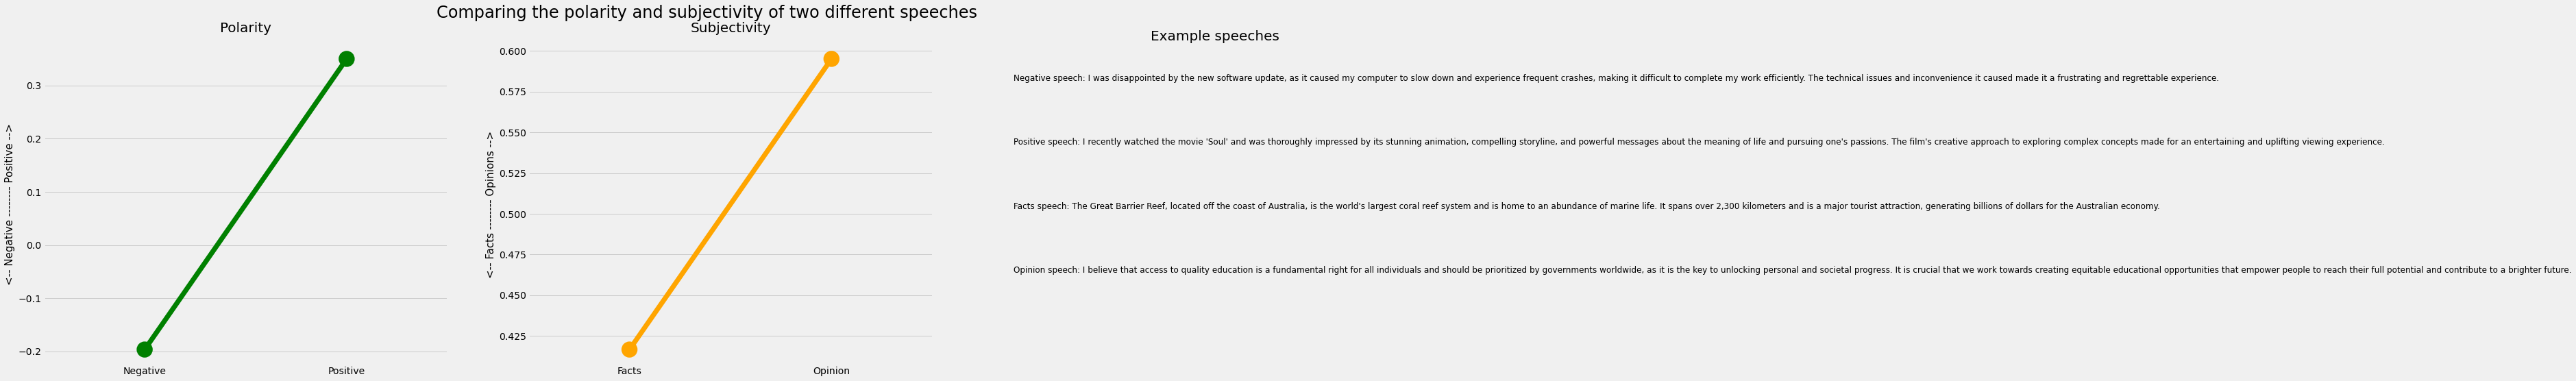

In [47]:
# Plotting the example scores
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [32, 8]

fig,(ax1, ax2, ax3) = plt.subplots(1,3)

plt.suptitle('Comparing the polarity and subjectivity of two different speeches', fontsize=24)

sns.pointplot(x=['Negative', 'Positive'], y=[neg_score, pos_score], ax=ax1, color='green')
ax1.set_ylabel('<-- Negative -------- Positive -->', fontsize=15)
sns.pointplot(x=['Facts', 'Opinion'], y=[fact_score, opinion_score], ax=ax2, color='orange')
ax2.set_ylabel('<-- Facts -------- Opinions -->', fontsize=15)

# Removing the axes of ax3
ax3.axis('off')
ax3.set_title('Example speeches', fontsize=20)
ax3.annotate(f'Negative speech: {negative_speech_example}', xy=(0, 0.8), xytext=(0, 50), xycoords='axes fraction', textcoords='offset points', size=12, va='top', wrap=True)
ax3.annotate(f'Positive speech: {positive_speech_example}', xy=(0, 0.6), xytext=(0, 50), xycoords='axes fraction', textcoords='offset points', size=12, va='top', wrap=True)
ax3.annotate(f'Facts speech: {facts_speech_example}', xy=(0, 0.4), xytext=(0, 50), xycoords='axes fraction', textcoords='offset points', size=12, va='top', wrap=True)
ax3.annotate(f'Opinion speech: {opinion_speech_example}', xy=(0, 0.2), xytext=(0, 50), xycoords='axes fraction', textcoords='offset points', size=12, va='top', wrap=True)


# Adding the example speeches unerneath the plots

# ax1.annotate(f'Positive speech: {positive_speech_example}', xy=(0, -0.03), xytext=(0, -50), xycoords='axes fraction', textcoords='offset points', size=12, va='top')
# ax1.annotate(f'Negative speech: {negative_speech_example}', xy=(0, -0.08), xytext=(0, -50), xycoords='axes fraction', textcoords='offset points', size=12, va='top')

# plt.annotate(f'Facts speech: {facts_speech_example}', xy=(0, -0.13), xytext=(0, -50), xycoords='axes fraction', textcoords='offset points', size=12, va='top')
# ax1.annotate(f'Opinion speech: {opinion_speech_example}', xy=(0, -0.18), xytext=(0, -50), xycoords='axes fraction', textcoords='offset points', size=12, va='top')

plt.text(0.5, 1.05, 'Polarity', ha='center', va='center', transform=ax1.transAxes, fontsize=20)
plt.text(0.5, 1.05, 'Subjectivity', ha='center', va='center', transform=ax2.transAxes, fontsize=20)


plt.tight_layout()
plt.savefig('./figures/example_speech_scores.png', dpi=300)


fig.show()

In [7]:
corpus.head()

,sotu_date,president_name,clean_text,president_party,year,polarity,subjectivity
0,1793-12-03,George Washington,fellow citizens of the senate and house of rep...,federalist,1793,0.085069,0.419816
1,1794-11-19,George Washington,fellow citizens of the senate and house of rep...,federalist,1794,0.137494,0.478949
2,1795-12-08,George Washington,fellow citizens of the senate and house of rep...,federalist,1795,0.149769,0.463400
3,1796-12-07,George Washington,fellow citizens of the senate and house of rep...,federalist,1796,0.147007,0.427243
4,1797-11-22,John Adams,gentlemen of the senate and gentlemen of the h...,federalist,1797,0.079879,0.443563


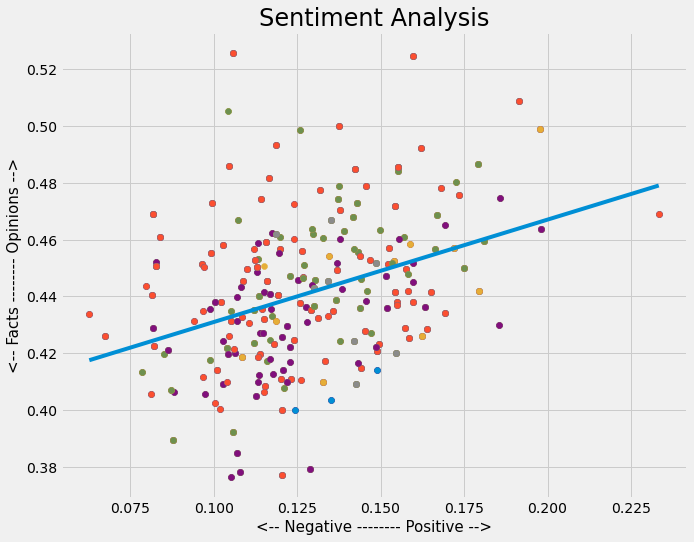

In [8]:
# Plotting the results
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [10, 8]

for index, president in enumerate(corpus.president_name):
    x = corpus.loc[corpus.president_name == president].polarity
    y = corpus.loc[corpus.president_name == president].subjectivity
    plt.scatter(x, y)
    #plt.text(x+.001, y+.001, corpus['president_name'], fontsize=10)
    #plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=24)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)
# plotting the line of best fit
plt.plot(np.unique(corpus.polarity), np.poly1d(np.polyfit(corpus.polarity, corpus.subjectivity, 1))(np.unique(corpus.polarity)))

plt.show()

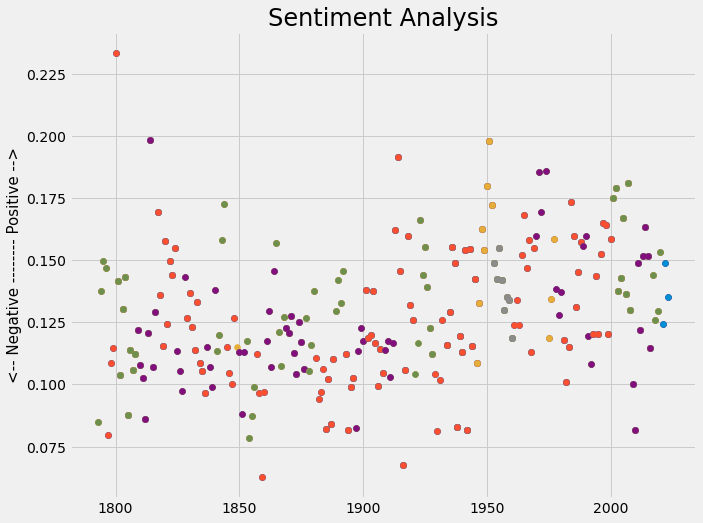

In [9]:
# Plotting the polarity over time
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [10, 8]

for index, president in enumerate(corpus.president_name):
    x = corpus.loc[corpus.president_name == president].year
    y = corpus.loc[corpus.president_name == president].polarity
    plt.scatter(x, y)
    #plt.text(x+.001, y+.001, corpus['president_name'], fontsize=10)
    #plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=24)
plt.xlabel('')
plt.ylabel('<-- Negative -------- Positive -->', fontsize=15)
# plotting the line of best fit
# plt.plot(np.unique(corpus.polarity), np.poly1d(np.polyfit(corpus.polarity, corpus.subjectivity, 1))(np.unique(corpus.polarity)))

plt.show()

In [10]:
grouped_by_year = corpus.groupby('year').agg({'polarity': 'mean', 'subjectivity': 'mean'})
grouped_by_year['polarity_rolling_avg'] = grouped_by_year.polarity.rolling(4).mean()
grouped_by_year['subjectivity_rolling_avg'] = grouped_by_year.subjectivity.rolling(10).mean()
grouped_by_year.head()

,polarity,subjectivity,polarity_rolling_avg,subjectivity_rolling_avg
year,,,,
1793,0.085069,0.419816,NaN,NaN
1794,0.137494,0.478949,NaN,NaN
1795,0.149769,0.463400,NaN,NaN
1796,0.147007,0.427243,0.129835,NaN
1797,0.079879,0.443563,0.128537,NaN


In [11]:
dates = list(grouped_by_year.index)
events = ['WW1', 'WW2', 'Great Depression', '9/11']

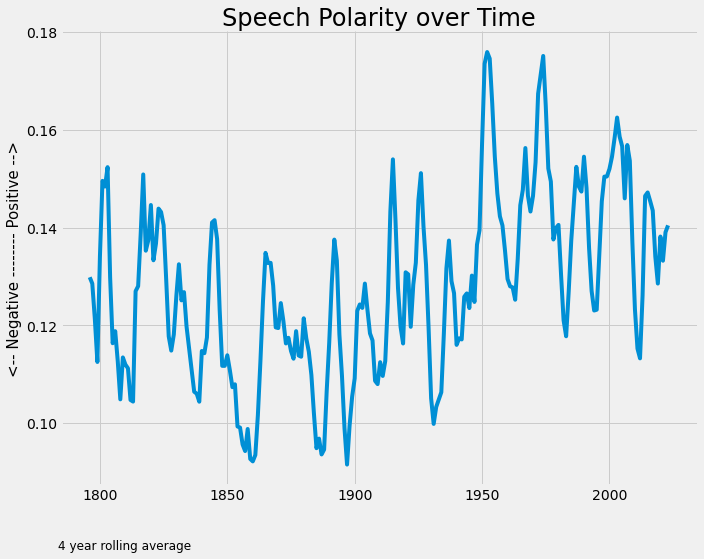

In [12]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [10, 8]

dates = grouped_by_year.index

fig, ax = plt.subplots()

ax = sns.lineplot(x='year', y='polarity_rolling_avg', data=grouped_by_year)
# annotate lines
ax.set_title("Speech Polarity over Time", fontsize=24)
ax.set_ylabel('<-- Negative -------- Positive -->', fontsize=15)
ax.set_xlabel('')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.annotate('4 year rolling average', xy=(0.1, -0.03), xytext=(0, -40), xycoords='axes fraction', textcoords='offset points', size=12, ha='center', va='top')
plt.tight_layout()
plt.savefig('./figures/polarity_all.png', dpi=300)

plt.show()

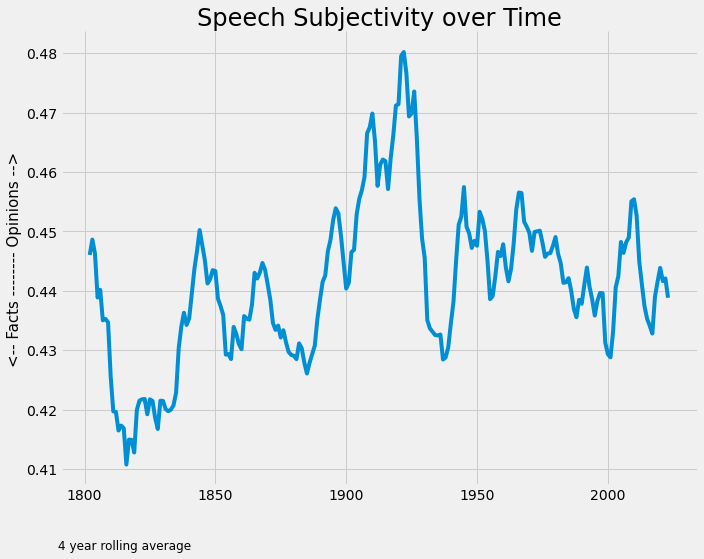

In [13]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [10, 8]

dates = grouped_by_year.index

fig, ax = plt.subplots()

ax = sns.lineplot(x='year', y='subjectivity_rolling_avg', data=grouped_by_year)
# annotate lines
ax.set_title("Speech Subjectivity over Time", fontsize=24)
#ax.set_xlabel('Year', fontsize=15)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
plt.xlabel('')
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)
ax.annotate('4 year rolling average', xy=(0.1, -0.03), xytext=(0, -40), xycoords='axes fraction', textcoords='offset points', size=12, ha='center', va='top')
plt.tight_layout()
plt.savefig('./figures/subjectivity_all.png', dpi=300)

plt.show()

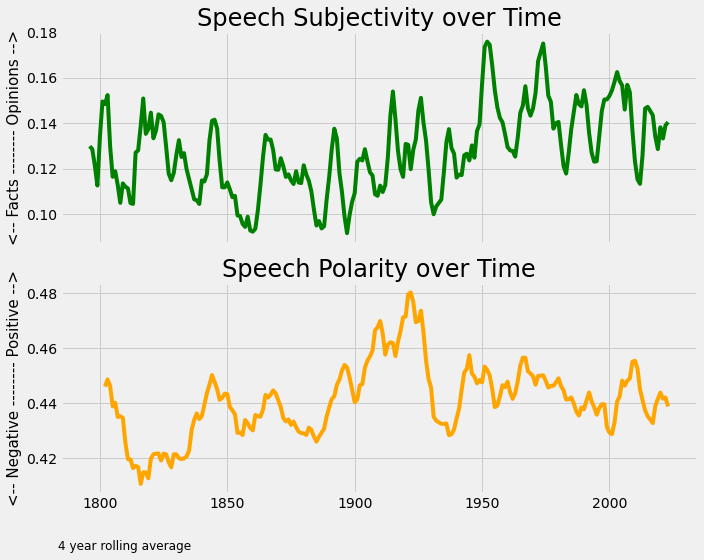

In [58]:
# Creating a combined plot
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [10, 8]

dates = grouped_by_year.index

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

sns.lineplot(x='year', y='polarity_rolling_avg', data=grouped_by_year, ax=ax1, color='green')
sns.lineplot(x='year', y='subjectivity_rolling_avg', data=grouped_by_year, ax=ax2, color='orange')

ax1.set_title("Speech Subjectivity over Time", fontsize=24)
ax2.set_title("Speech Polarity over Time", fontsize=24)

ax1.set_ylabel('<-- Facts -------- Opinions -->', fontsize=15)
ax2.set_ylabel('<-- Negative -------- Positive -->', fontsize=15)
ax2.set_xlabel('')

ax2.annotate('4 year rolling average', xy=(0.1, -0.03), xytext=(0, -40), xycoords='axes fraction', textcoords='offset points', size=12, ha='center', va='top')
plt.tight_layout()

plt.savefig('./figures/subjectivity_polarity_all.png', dpi=300)


In [14]:
# import plotly
# import plotly.express as px

# fig = px.scatter(corpus, x="subjectivity", y="polarity", color="year",
#                  hover_data=['president_name'])
# fig.show()

In [15]:
# # Plotting Subjectivity vs Polarity

# fig1 = px.scatter(corpus, x="polarity", y="subjectivity",
#                  hover_data=['president_name'], trendline="ols")

# fig1.update_layout(
#     xaxis = dict(
#         title_text = '<-- Negative -------- Positive -->',
#         title_standoff = 25),
#     yaxis = dict(
#         title_text = '<-- Facts -------- Opinions -->',
#         title_standoff = 25))

# fig1.show()

In [16]:
# # Plotting Subjectivity vs Polarity - Looking at individual presidents

# fig2 = px.scatter(corpus, x="polarity", y="subjectivity",
#                  hover_data=['president_name'], color="president_name")

# fig2.update_layout(
#     xaxis = dict(
#         title_text = '<-- Negative -------- Positive -->',
#         title_standoff = 25),
#     yaxis = dict(
#         title_text = '<-- Facts -------- Opinions -->',
#         title_standoff = 25))

# fig2.show()

In [17]:
# # Testing Dash dashboard
# app = dash.Dash()
# app.layout = html.Div([
#     dcc.Graph(figure=fig2),
#     dcc.Graph(figure=fig1)
# ])
# app.run_server(debug=True, use_reloader=False)  # Turn off reloader if inside Jupyter

In [18]:
# Analysis by party post civil rights movement
post_civil_rights= corpus.loc[corpus.year >= 1965]

rep_corpus = post_civil_rights.loc[post_civil_rights.president_party == 'republican']
dem_corpus = post_civil_rights.loc[post_civil_rights.president_party == 'democrat']

In [19]:
avg_pol_rep = rep_corpus.polarity.mean()    
avg_pol_dem = dem_corpus.polarity.mean()

print('Average polarity for republicans: ', avg_pol_rep)
print('Average polarity for democrats: ', avg_pol_dem)

Average polarity for republicans:  0.14287721223324445
Average polarity for democrats:  0.13824037516564222


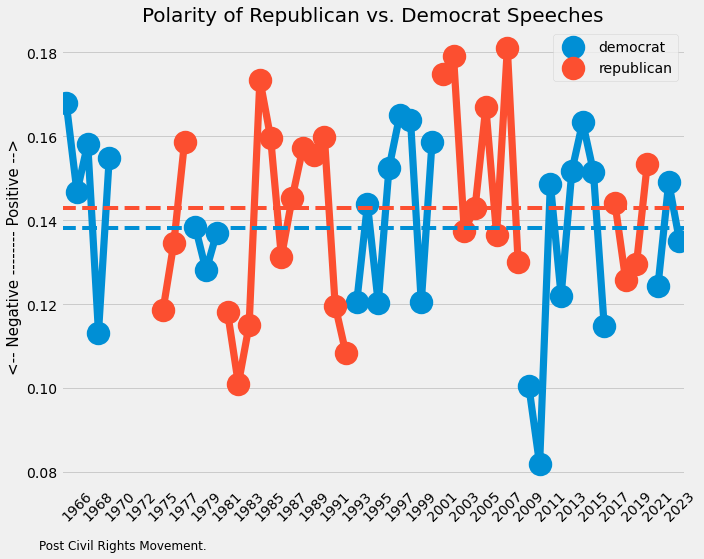

In [20]:
# Comparing the polarity of Republican and Democrat speeches
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [10, 8]

fig, ax = plt.subplots()

ax = sns.pointplot(x='year', y='polarity', data=post_civil_rights, hue='president_party')

# Adding horizontal line for average polarity for both parties
ax.axhline(rep_corpus.polarity.mean(), color='#FC4F31', linestyle='--')
ax.axhline(dem_corpus.polarity.mean(), color='#008FD5', linestyle='dashed')
# Figure title
plt.title('Polarity of Republican vs. Democrat Speeches', fontsize=20)
# Changing the x-axis tick labels
plt.xticks(rotation=45)
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
    
# adding a footnote
ax.annotate('Post Civil Rights Movement.', xy=(0.1, -0.03), xytext=(0, -40), xycoords='axes fraction', textcoords='offset points', size=12, ha='center', va='top')
# hiding x-axis label
plt.xlabel('')
plt.ylabel('<-- Negative -------- Positive -->', fontsize=15)
plt.legend()
plt.tight_layout()
plt.savefig('./figures/polarity_by_party_post_civil_rights.png', dpi=300)

plt.show()

/var/folders/6t/_k6kmr152jq69rjlrcg91mb00000gn/T/ipykernel_28318/1080842982.py:27: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



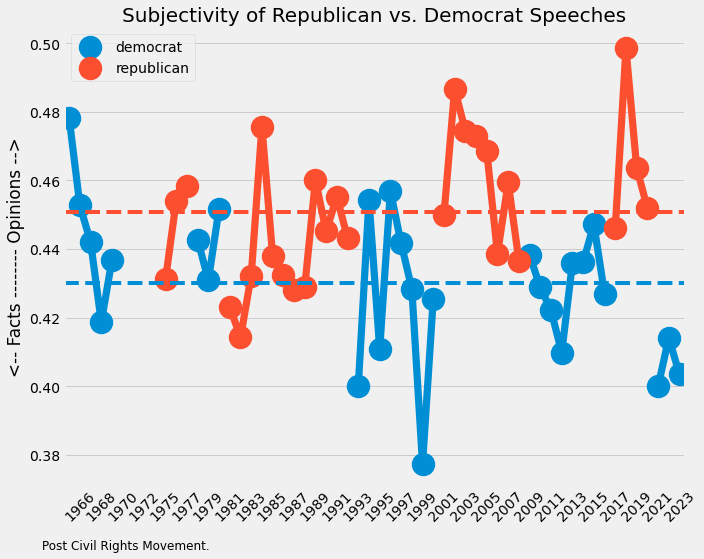

In [21]:
# Comparing the polarity of Republican and Democrat speeches
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [10, 8]

fig, ax = plt.subplots()

ax = sns.pointplot(x='year', y='subjectivity', data=post_civil_rights, hue='president_party')

# Adding horizontal line for average polarity for both parties
ax.axhline(rep_corpus.subjectivity.mean(), color='#FC4F31', linestyle='--')
ax.axhline(dem_corpus.subjectivity.mean(), color='#008FD5', linestyle='dashed')
# Figure title
plt.title('Subjectivity of Republican vs. Democrat Speeches', fontsize=20)
# Changing the x-axis tick labels
plt.xticks(rotation=45)
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
# adding a footnote
ax.annotate('Post Civil Rights Movement.', xy=(0.1, -0.03), xytext=(0, -40), xycoords='axes fraction', textcoords='offset points', size=12, ha='center', va='top')
# hiding x-axis label
plt.xlabel('')
plt.ylabel('<-- Facts -------- Opinions -->')
plt.legend()
plt.tight_layout()
plt.savefig('./figures/subjectivity_by_party_post_civil_rights.png', dpi=300)

fig.show()

In [22]:
# import matplotlib.pyplot as plt
# import matplotlib.animation as animation
# %matplotlib notebook
# # Creating animated plot of polarity over time
# def animate(i):
#     data = df.iloc[:int(i+1)]
#     graph = sns.pointplot(x='year', y='subjectivity', data=post_civil_rights, hue='president_party')

In [23]:
# ani = animation.FuncAnimation(fig, animate, frames=len(post_civil_rights.index),interval=700,repeat=True)
# ani